In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y = make_regression(n_samples=2000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[ 0.94569709,  0.07931723],
       [ 0.24523619, -0.38660537],
       [-0.3173207 ,  0.28737694],
       ...,
       [-1.20922938,  2.10184361],
       [ 0.8223113 , -1.19375209],
       [ 0.20780604,  1.02168446]])

In [5]:
y

array([72.0599942 , -3.82107335, -6.21267918, ..., 20.93613483,
        0.25298522, 70.71407356])

<AxesSubplot:xlabel='0', ylabel='1'>

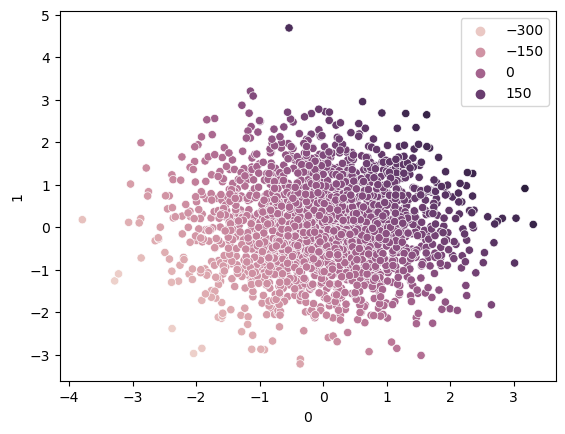

In [6]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
model = SVR(kernel='linear')

In [11]:
model.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
model.coef_

array([[77.35237441, 54.43688121]])

In [13]:
y_pred = model.predict(X_test)

In [14]:
y_pred

array([-4.08409677e+01,  1.05564990e+02,  5.46449677e+01, -2.09575619e+01,
        4.37100226e+01,  5.85655510e+01, -1.09287119e+02,  4.10257104e+01,
       -1.65075451e+02,  6.62948917e+01,  6.83031664e+01,  1.46887001e+02,
       -7.51744518e+01, -6.07182672e+01, -4.05532239e+01,  1.00398018e+01,
        1.71550321e+02,  6.23218938e+01, -4.85795405e+01,  1.85435642e+02,
        1.03780147e+02, -1.18815723e+02, -1.09259998e+02, -1.59736604e+02,
       -4.67970512e+01, -2.07056561e+02, -6.50381261e+01, -1.11206094e+02,
       -1.27001020e+01, -1.06249573e+01, -3.02951404e+01,  1.02309378e+02,
       -1.28093002e+02,  5.42191161e+01, -1.58072811e+02,  2.15106614e+01,
       -6.23424099e+01, -1.66249032e+02,  1.13897677e+02, -7.33057479e+01,
        7.45262712e+01, -1.83320754e+02,  2.18475009e+02,  6.71827218e+01,
       -6.38084291e+01, -1.57568063e+01,  4.10783265e+01, -1.47832574e+01,
        8.32160675e+01, -3.56965960e+01, -4.92318215e+01, -1.26744598e+01,
        7.63027411e+00,  

In [15]:
from sklearn.metrics import r2_score

In [16]:
rs = r2_score(y_pred,y_test)
print('R2 Score: ',rs)

R2 Score:  0.9990195722975004


### Hyperparameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV

In [20]:
params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon': [0.1,0.2,0.3]
        }

svr = SVR()

In [21]:
 clf = GridSearchCV(svr,param_grid=params,refit=True,cv=5,verbose=2)

In [22]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END .........C=0.1, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.1, gamma=0.01, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=2)

In [23]:
clf.best_estimator_

SVR(C=1000, gamma=1, kernel='linear')

In [25]:
clf.best_params_

{'C': 1000, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [26]:
y_pred = clf.predict(X_test)

In [28]:
rs = r2_score(y_pred,y_test)
print('R2 Score: ',rs)

R2 Score:  0.9990420109901451
